<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

# Анализ A/B-теста

# Шаг 0. Введение

Задача проекта приоритизация гипотез и анализ результатов A/B-теста.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# Шаг 1. Приоритизация гипотез

In [3]:
df1=pd.read_csv('/datasets/hypothesis.csv')

In [4]:
df1

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE и отсортируем результат по убыванию приоритета.

In [5]:
df1['ICE']=df1['Impact']*df1['Confidence']/df1['Efforts']

In [6]:
df1.sort_values(by='ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Применим фреймворк RICE и отсортируем результат по убыванию приоритета.

In [7]:
df1['RICE']=df1['Reach']*df1['Impact']*df1['Confidence']/df1['Efforts']

In [8]:
df1.sort_values(by='RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


В отличии от ICE фреймворк RICE иммет компонент Reach — охват, благодаря которому гипотезы, затрагивающие большую аудиторию, перемещаются в топ списка.

<font color='blue'> Приоритизация гипотез выполнена верно. все правильно рассчитано, только ICE стоило отформатировать до 1-2 знаков. </font>

# Шаг 2. Анализ А/В теста

In [ ]:
Сформулируем гипотезу H₀

доходы оператора в Москве и регионах одинаковы
Альтернативная гипотеза H₁

доходы оператора в Москве и регионах отличаются

Взлянем на данные теста

In [9]:
orders=pd.read_csv('/datasets/orders.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.drop_duplicates()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
visitors=pd.read_csv('/datasets/visitors.csv')

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors.drop_duplicates()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Дубликаты и пропуски отсутствуют.

 Приведем столбцы с датами к нужному формату

In [15]:
visitors["date"] = pd.to_datetime(visitors["date"])
orders["date"] = pd.to_datetime(orders["date"])

Построим график кумулятивной выручки по группам

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


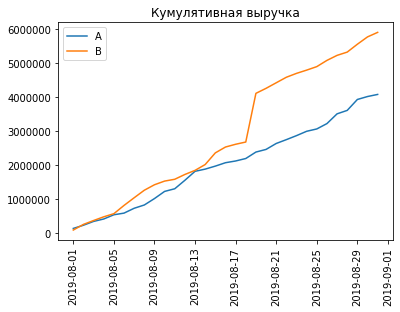

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation='vertical')
plt.title('Кумулятивная выручка')
plt.legend()

В середине теста наблюдается резкий рост выручки группы В относительно группы А. Однако наклон кривых примерно одинаковый. Это может быть связано с несколькими очень крупными заказами.

<font color='blue'> Да, все правильно построено. </font>

Построим график кумулятивного среднего чека по группам

Text(0.5, 1.0, 'Кумулятивный средний чек')

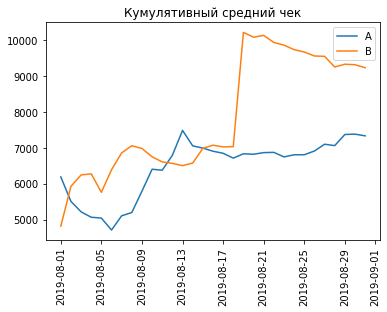

In [17]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Кумулятивный средний чек')

Действительно, в середеине августа были очень крупные покупки.

<font color='blue'> Отлично. </font>

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Text(0.5, 1.0, 'Относительный прирост кумулятивного среднего чека группы B к группе A')

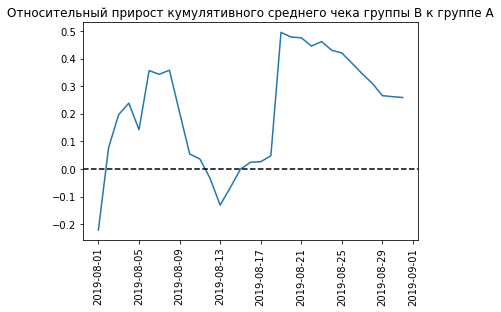

In [18]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.xticks(rotation='vertical')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный прирост кумулятивного среднего чека группы B к группе A')

Из графика видно, что группа B в конце теста уверенно лидирует

<font color='blue'> Все верно. Но здесь стоило отметить, что все три графика демонстрируют одну картину - крупные покупки в определенные даты. </font>

Построим график кумулятивной конверсии по группам

Text(0.5, 1.0, 'Кумулятивная конверсия по группам')

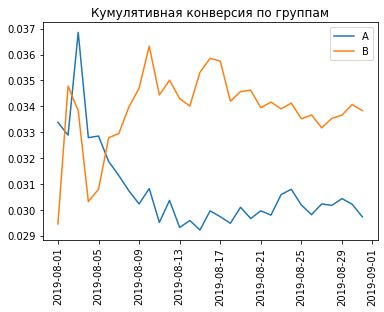

In [19]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')

plt.xticks(rotation='vertical')
plt.legend()
plt.title('Кумулятивная конверсия по группам')

Конверсии тоже заметно отличаются

<font color='blue'> Хорошо. </font>

Построим график относительного изменения кумулятивной конверсии группы B к группе A

Text(0.5, 1.0, 'Относительный прирост конверсии группы B относительно группы A')

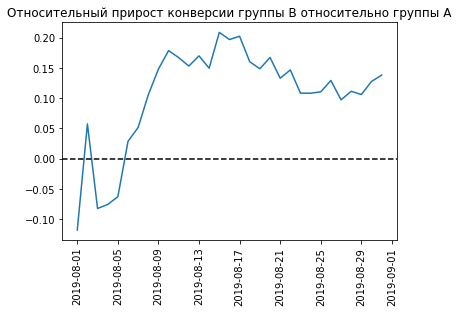

In [20]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1)
plt.xticks(rotation='vertical')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Относительный прирост конверсии группы B относительно группы A")

Группа В успешнее А в среднем на 12 процентов

<font color='blue'> Ок, все графики построены верно. </font>

Построим точечный график количества заказов по пользователям

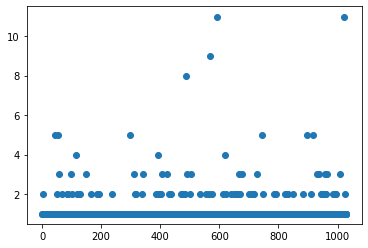

In [21]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])

Пользователей совершивщих более 3 заказов очень мало

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [22]:
np.percentile(ordersByUsers['orders'],[95,99])

array([2., 4.])

Выберем 3 заказа в качестве границы для определения аномальных пользователей

In [23]:
maxorders=3

Построим точечный график стоимостей заказов

<font color='blue'> А где же точечный график. </font>

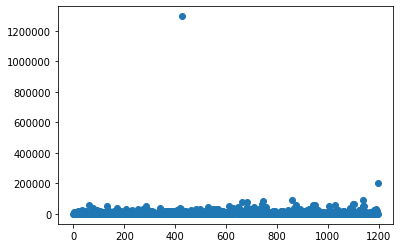

In [24]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values,orders['revenue'])

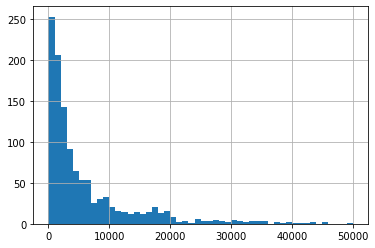

In [25]:
orders['revenue'].hist(bins=50,range=(0,50000))

Клиенты делают очень мало заказов свыше 30000

<font color='blue'> На точечном графике аномалии были бы видны лучше, но и здесь видно, что есть единичные коиенты с очень длорогими заказами - это и вызвало скачки на графиках выше - это стоило отметить. </font>

Посчитаем 95-й и 99-й перцентили стоимости заказов

In [26]:
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

Выберем 28000 в качестве границы среднего чека для определения аномальных пользователей

<font color='blue'> В качестве уровня отсечения всегда стоит выбирать квантили без округления. </font>

In [27]:
maxcheck=28000

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [28]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value для сравнения конверсии между группами {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("относительное различие в конверсии между группами {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value для сравнения конверсии между группами 0.00840
относительное различие в конверсии между группами 0.138


Конверсия отличаются почти на 14 процентов и это подтверждает небольшое значение p-value

<font color='blue'> Хорошо. </font>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [30]:
print("p-value для сравнения среднего чеке между группами {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("относительное различие среднего чеке  между группами {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value для сравнения среднего чеке между группами 0.365
относительное различие среднего чеке  между группами 0.259


Средние чеки отличаются на 26 процентов, однако p-value значительно больше 0.05, значит этот результат мог получиться случайно

<font color='blue'> Все верно. </font>

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

In [31]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > maxorders]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > maxcheck]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value для сравнения конверсии между группами {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("относительное различие в конверсии между группами {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value для сравнения конверсии между группами 0.01047
относительное различие в конверсии между группами 0.129


Теперь конверсия отличаются на 13 процентов, а p-value по прежнему мало

<font color='blue'> Ок, правильно. </font>

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [32]:
print("p-value для сравнения среднего чека между группами {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("относительное различие среднего чека между группами {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value для сравнения среднего чека между группами 0.447
относительное различие среднего чека между группами -0.024


p-value стал еше больше, а различие чеков снизилось до 3 процентов

<font color='blue'> Все гипотезы проверены верно, молодец. </font>

# Шаг 3. Заключение

- Между группами есть уверенное различие в конверсии как по «сырым» так и по отфильтраванным данным.
- Статистически значимого различия в среднем чеке между группами необнаружено.
- График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A.
- График различия среднего чека показывает что в группе В были заказы с очень крупными чеками, однако в среднем значения не отличаются от группы А.

На основе проведенного анализа можно рекомендовать остановить тест и зафиксировать победу группы В. В ней конверсия действительно выше.

<font color='blue'> Проект выполнен отлично. </font>